# Part 1

In [1]:
# imported data into jupyter notebook. can now access data inside
# rename file to : ASTR19_project_data.txt
data = open('ASTR19_project_data.txt','r')

read_data = data.readlines()

read_data

['#Column A: Day of the year\n',
 '#Column B: Time in hours:minutes\n',
 '#Column B: Tide Height in feet\n',
 ' 1  8:07  6.57\n',
 ' 1 15:37 -0.39\n',
 ' 2  8:55  5.38\n',
 ' 2 16:25 -1.74\n',
 ' 3  9:45  5.26\n',
 ' 3 17:14 -1.36\n',
 ' 4 10:35  4.13\n',
 ' 4 18:00 -1.15\n',
 ' 5 11:28  3.48\n',
 ' 5 18:46 -1.61\n',
 ' 6 12:22  2.62\n',
 ' 6 19:31  0.05\n',
 ' 7 13:24  1.83\n',
 ' 7 20:16  1.01\n',
 ' 8  3:22  3.57\n',
 ' 8 21:01  0.73\n',
 ' 9  4:07  4.54\n',
 ' 9 21:46  2.17\n',
 '10  4:50  3.76\n',
 '10 11:58  2.88\n',
 '11  5:31  3.90\n',
 '11 12:56  1.92\n',
 '12  6:08  4.73\n',
 '12 13:45  1.74\n',
 '13  6:47  5.66\n',
 '13 14:25  0.79\n',
 '14  7:22  5.33\n',
 '14 15:00 -0.04\n',
 '15  7:59  5.23\n',
 '15 15:34 -1.12\n',
 '16  8:34  6.67\n',
 '16 16:08 -0.61\n',
 '17  9:10  4.74\n',
 '17 16:41 -0.93\n',
 '18  9:45  4.69\n',
 '18 17:12 -1.29\n',
 '19 10:21  4.20\n',
 '19 17:45  0.22\n',
 '20 10:57  3.68\n',
 '20 18:15  0.26\n',
 '21 11:38  2.47\n',
 '21 18:48  0.36\n',
 '22 12:2

In [2]:
import numpy as np

data = np.loadtxt("ASTR19_project_data.txt", dtype=str, comments="#")

/var/folders/34/6wn71cqj2ybgw7yh7rwjtmx40000gn/T/ipykernel_22714/2424580422.py:3: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  data = np.loadtxt("ASTR19_project_data.txt", dtype=str, comments="#")


In [3]:
#Makes data columns separate and converts them to the correct data types to use later
day = data[:,0].astype(float)
time_str = data[:,1]
height = data[:,2].astype(float)


In [4]:
#Converts the time values in data into numerical hours --> so they can be used for plotting 
def to_hours(t):
    h, m = t.split(":")
    return int(h) + int(m)/60

hours = np.array([to_hours(t) for t in time_str])

In [5]:
x = day + hours/24
h = height
#create a linespace that has 1000 points between x range
t = np.linspace(0,43,1000)


# Part 2

In [6]:
from scipy import optimize
import matplotlib.pyplot as plt

a = (max(height) - min(height)) / 2
i = np.mean(h)

def oscillatory_fnc(t, a, b, c, g, d, i):
    return i + a * (np.cos(b*t+c)) * np.cos(g*t+d)
    
#curve fit the function
params, params_cov = optimize.curve_fit(oscillatory_fnc, x, h, p0=[a, 1.5, 0, 1.2, 0, i])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
g_fit = params[3]
d_fit = params[4]
i_fit = params[5]

# print them in one line (slide style)
print(a_fit, b_fit, c_fit, g_fit, d_fit, i_fit)

y_fit = i_fit+1 + a_fit-4 * (np.cos(b_fit*t+c_fit)) * np.cos(g_fit*t+d_fit)

#Compute residuals
y_fit_data = oscillatory_fnc(x, a_fit, b_fit, c_fit, g_fit, d_fit, i_fit)
residuals = h - y_fit_data

-1.0836119736113299 1.5596093274319514 -1.510279157190113 1.1270889891198186 0.9051486871023086 2.4953118506847316


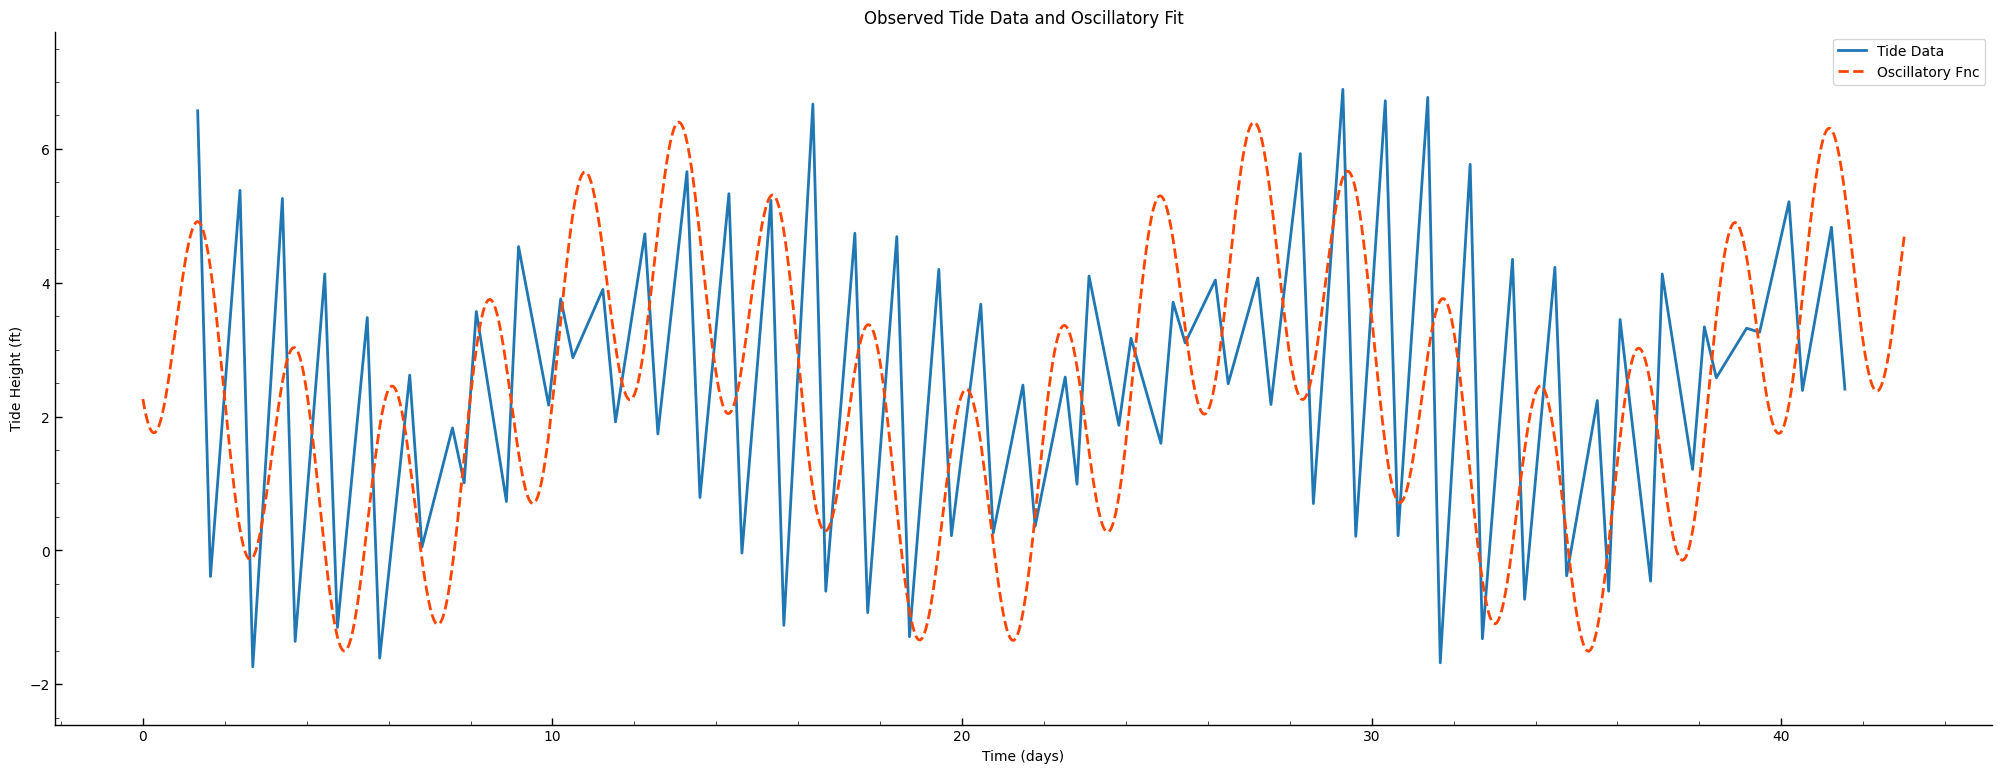

In [7]:
plt.style.use("./astr19_matplotlib_defaults.txt")

plt.figure(figsize=(25,9))

# Raw data
plt.plot(x, h, label="Tide Data")


# Simple oscillatory graph
plt.plot(t, y_fit, label="Oscillatory Fnc", linestyle="--", color="orangered")
plt.title("Observed Tide Data and Oscillatory Fit") 
plt.xlabel("Time (days)")
plt.ylabel("Tide Height (ft)")
plt.legend()
#Required to save fig
plt.savefig("tide_function.pdf")

plt.show()

# Part 3

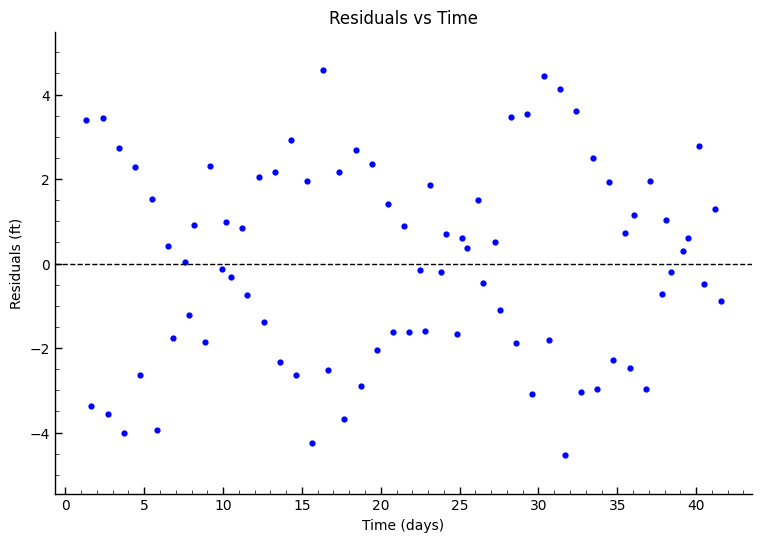

In [8]:
#Subtract the best fit function from the data & plot the residuals
plt.figure(figsize=(9,6))
plt.scatter(x, residuals, s=12, color='blue', edgecolor='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel("Time (days)")
plt.ylabel("Residuals (ft)")
plt.title("Residuals vs Time")
plt.show()


In [9]:
#Assess the deviations of the measured tidal data & the model data mathematically
#Mathematically displaying the standard deviation of the residuals
residual_std = np.std(residuals)
print("STD deviation of residuals:", residual_std)

#Numerically comparing the standard deviation to the assumed measurement error of 0.25 ft
measurement_error = 0.25
print("Measurement error:", measurement_error)

if residual_std > measurement_error:
    print("The data's scatter is larger than the assumed measurement error.")
else:
    print("The scatter follows the assumed measurement error.")
#"Estimate the intrinsic scatter in the data after accounting for the assumed measurement error”
Intrinsic_scatter = np.sqrt(max(0, residual_std**2 - measurement_error**2))
print("Estimated Intrinsic Scatter:", Intrinsic_scatter)


STD deviation of residuals: 2.321766066043306
Measurement error: 0.25
The data's scatter is larger than the assumed measurement error.
Estimated Intrinsic Scatter: 2.30826724307005


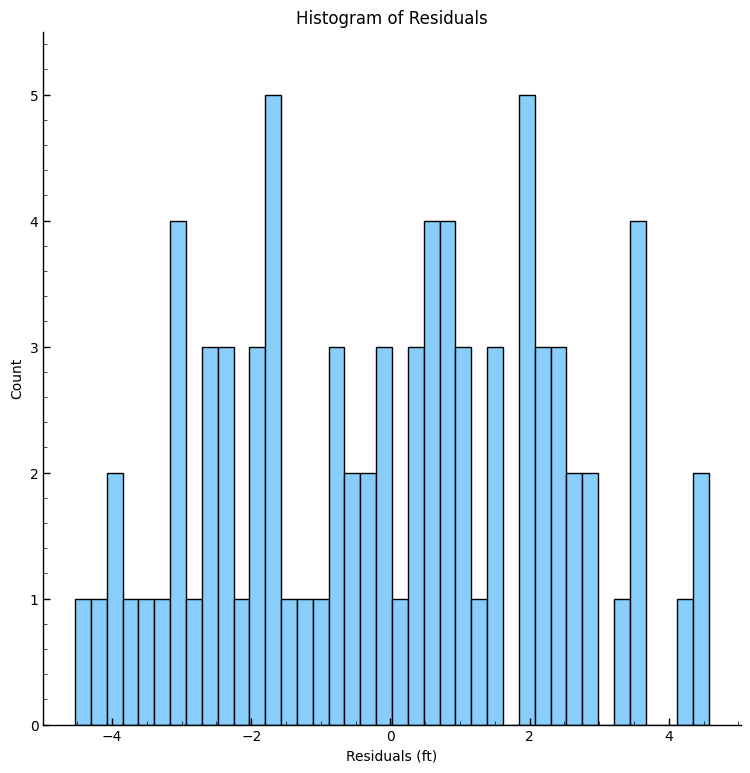

In [10]:
#plot the residuals
plt.figure(figsize=(9,9))
plt.hist(residuals, bins=40, edgecolor='black', facecolor='lightskyblue')
plt.xlabel("Residuals (ft)")
plt.ylabel("Count")
plt.title("Histogram of Residuals")

#Save Histogram as a pdf 
plt.savefig("residuals_histogram.pdf")

plt.show()

# Part 4

In [11]:
# adding 2ft oulier
tsunami_ft = 2.0
#calculate deviation size of tsunami based on standard deviations of normal tides
tsunami_deviation = tsunami_ft / residual_std
print(f'The deviation of the tsunami is {tsunami_deviation:.2f}, which is not large.')

The deviation of the tsunami is 0.86, which is not large.


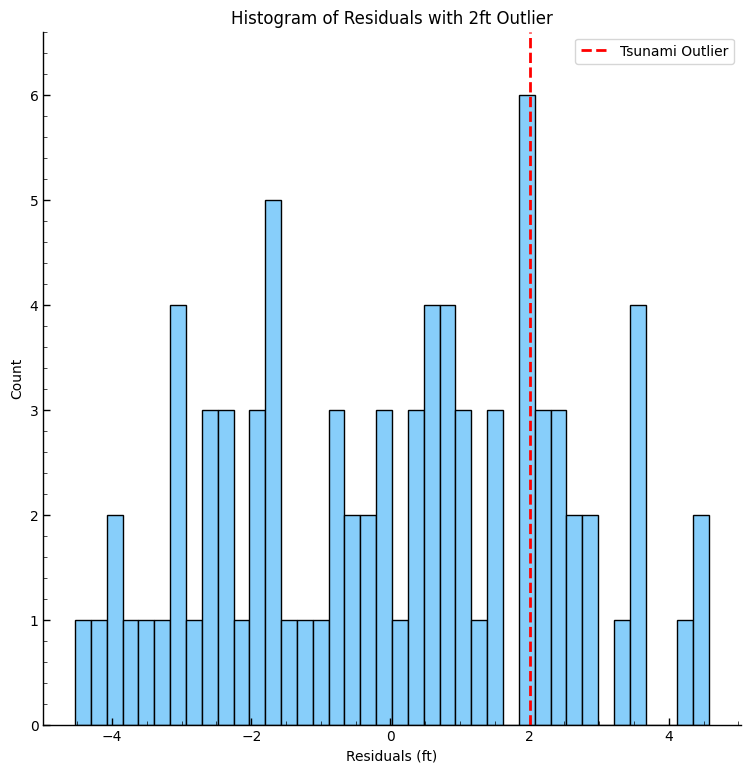

In [12]:
# adding tsunami to new data set of residuals
residuals_new = np.append(residuals, tsunami_ft)

#replot with outlier
plt.figure(figsize=(9,9))
plt.hist(residuals_new, bins=40, edgecolor='black', facecolor='lightskyblue')
plt.xlabel("Residuals (ft)")
plt.ylabel("Count")
plt.title("Histogram of Residuals with 2ft Outlier")

# highlighting the outlier
plt.axvline(
    tsunami_ft,
    color='red',
    linestyle='dashed',
    linewidth=2,
    label='Tsunami Outlier')

plt.legend()
plt.show()